# Agrupamento usando K-means


## 1) Importar módulos necessários 

In [120]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.random import uniform
import random

## 2) Gerar dataset


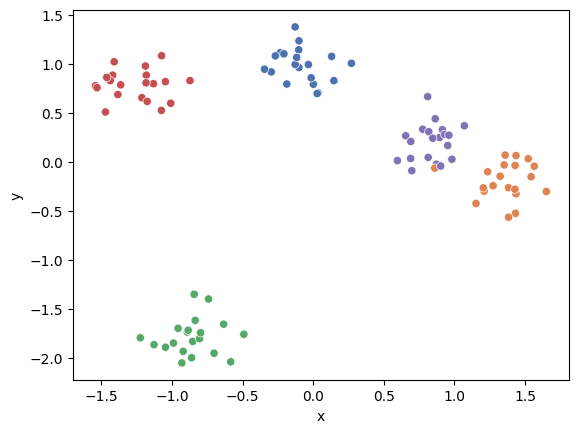

In [121]:
centers = 5

# Gera 5 grupos de dados bi-demensionais 
X_treino, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)

# Normaliza os dados de treino
X_treino = StandardScaler().fit_transform(X_treino)

#! Pesquisar melhor sobre essa função
sns.scatterplot(x=[X[0] for X in X_treino],
                y =[X[1] for X in X_treino],
                hue=true_labels,
                palette="deep",
                legend=None)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 3) Criação do módelo 

### 3.1) Distância Euclidiana: 
Função resposável por calcular a distância euclidiana entre o ponto e o conjunto de pontos. Ponto tem dimensão 1xm e data tem dimensão mxn a saída vai ter dimensão 1xn

In [122]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))


### 3.2) Implementação: 
O algoritmo K-means precisa ser inicializado com o número de grupos (k) e o número máximo de iterações para encontrar o centroide ótimo. Se o número de iterações não for especificado, o algoritmo pode ficar preso em um loop infinito.

In [123]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def initCentroids(self, X_treino):
        # O centróides são escolhidos inicialmente de forma aleatório no domínio 
        # do conjunto de dados com uma distribuição normal
        min_, max_ = np.min(X_treino, axis=0), np.max(X_treino, axis=0)
        self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]

    def initCentroidsImproved(self, X_treino):
        #* O primeiro centroide é inicializado aleatoriamente como um dos 
        #* pontos do dataset. Então, o resto é inicializado com probabilidades 
        #* proporcionais a distância do primeiro 

        # Inicializa o primeiro centroide como um dado de treino aleatório
        self.centroids = [random.choice(X_train)]

        for _ in range(self.n_clusters-1):
            # Calcula a distância dos pontos aos centroides 
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normaliza as distâncias 
            dists /= np.sum(dists)
            # Escolhe os pontos faltantes com base em suas distâncias 
            new_centroid_idx, = np.random.choice(range(len(X_treino)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        

    def fit(self, X_treino):

        #! A inicialização dos centroides dessa forma não é tão boa
        # self.initCentroids(X_treino)

        self.initCentroidsImproved(X_treino)

        # Processo iterativo de otimização da localização dos centroides
        iterations = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iterations < self.max_iter:
            # Organiza cada ponto de dados ao centroide mais próximo 
            sorted_points = [[] for _ in range(self.n_clusters)]   # Cria a lista com uma quantidade de listas igual ao numero de centroides
            for x in X_train:
                dists = euclidean(x, self.centroids) # Lista com as distancia para cada centroide
                centroid_idx = np.argmin(dists) # Posição na lista da menor distância
                sorted_points[centroid_idx].append(x) # Coloca o ponto de dados na lista do centroide com menos dist

            # Atualiza a localização dos centroides e finaliza a iteração 
            prev_centroids = self.centroids # Salva os centroides antigos 
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any(): # Checa se tem algum centroide sem pontos
                    self.centroids[i] = prev_centroids[i]
            iterations += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs  = []

        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs

### 3.3) Metódo para avaliar o modelo 
Retorna o centroide e seu index para cada ponto  

In [124]:
def evaluate(self, X):
    centroids = []
    centroid_idxs  = []

    for x in X:
        dists = euclidean(x, self.centroids)
        centroid_idx = np.argmin(dists)
        centroids.append(self.centroids[centroid_idx])
        centroid_idxs.append(centroid_idx)

    return centroids, centroid_idxs


## 4) Avaliação do modelo 
As classes verdadeiras estão separadas por cores, mas agora além disso as previstas serão separadas por marcações estilizadas.

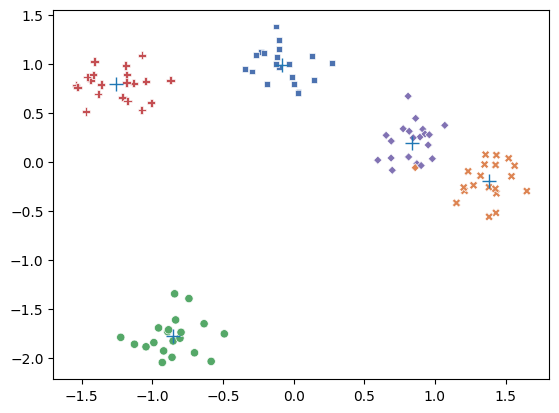

In [125]:
kmeans = KMeans(n_clusters=centers)
kmenas.fit(X_treino)

# Ver resultados
class_centers, classification = kmeans.evaluate(X_treino)
sns.scatterplot(x=[X[0] for X in X_treino],
                y=[X[1] for X in X_treino],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )

plt.plot([x for x, _ in kmeans.centroids],
        [y for _, y in kmeans.centroids],
        '+',
        markersize=10,
        )

plt.show()



# Referências
LUKE, Turner. Create a K-Means Clustering Algorithm from Scratch in Python. 2022. Disponível em: https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670. Acesso em: 02 maio 2023.
